<a href="https://colab.research.google.com/github/alviskagan/Twitter-Radicalism-Classification/blob/master/Twitter_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
!pip install -q PySastrawi
!pip install nltk
!pip install scikit-plot
!nltk.download()

     |████████████████████████████████| 215kB 2.7MB/s 
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [0]:
pip install imblearn


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import re
import seaborn as sns
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 

In [0]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras import backend as K
from keras.initializers import Constant
from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import to_categorical

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
# load the data set 
data = pd.read_csv("/gdrive/My Drive/LSTM Radikal/all.csv", names = ['user','tweets','category'], sep =",")

# print info about columns in the dataframe 
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 3 columns):
user        139 non-null object
tweets      139 non-null object
category    139 non-null object
dtypes: object(3)
memory usage: 3.4+ KB
None


In [0]:
data.head()

,user,tweets,category
0,@Gussumbogo,Lah siapa ente kok mau melarang dakwah Agama A...,Radikal-1
1,@WSuparmo,Tujuan akhir adalah mati JIHAD!,Radikal-1
2,@fauzanshbn,Makin beringas serangan musuh-musuh Allah. Mak...,Radikal-1
3,@RizalSaiba,"Allah Akbar..!!! Teruslah maju melangkah, seka...",Radikal-1
4,@paanbakaq,Islam Sejati Berani Mati #UP The one only #Ber...,Radikal-1


Text(0.5, 1.0, 'Number Radikal and Non')

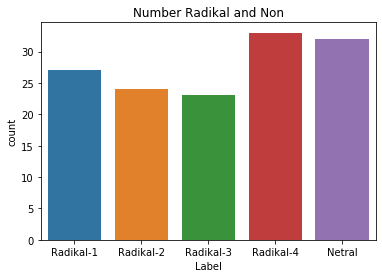

In [0]:
data.describe()
# data['category'][199]
sns.countplot(data.category)
plt.xlabel('Label')
plt.title('Number Radikal and Non')

In [0]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [0]:
data['tweets'] = data['tweets'].astype(str) # Merubah tipe data tweets menjadi string
data['tweets'] = data['tweets'].apply(lambda x: x.lower()) # Prosess Casefolding
data['tweets'] = data['tweets'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # Prosess Filtering
data['tweets'] = data['tweets'].apply(lambda x: stemmer.stem(x)) # Prosess Stemming


In [0]:
# Menghitung jumlah data radikal dan non
print(data[ data['category'] == 'Radikal-1'].size)
print(data[ data['category'] == 'Radikal-2'].size)
print(data[ data['category'] == 'Radikal-3'].size)
print(data[ data['category'] == 'Radikal-4'].size)
print(data[ data['category'] == 'Netral'].size)

81
72
69
99
96


In [0]:
# Menghilangkan kata rt pada tweets
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

**Slangword pre-processing**

In [0]:
import re
import nltk
import pandas as pd

String = "Buku ini selalu di rekomendasi,... *sebagai salah satu novel terbaik, #BukuBagus" \
         "@rifqifai Woaaahh.. udah habiissss.. n penasaran lanjutannya " \
         " huuu,,, huu,,, HuuuuSudah lama nggak menangis sambil tertawa karena membaca buku. ==a" \
         "Saya terkagum-kagum dengan pribadi Nyai Ontosoroh, yaitu Sunikem" \
         " persahabatan yang mereka jalin sungguh manis sekali... :)" \
         " 'Kenapa baru baca sekarang!?!?!?!?' Memang buku yang sungguh luar biasa. \^_^/" \
         "Bintang 5 dech. Bukuu yang benar-benar membuat saya termotivasi, Membuat saya hangat *etcieh." \
         "Wow.. Cuma itu yang bisa aku ucapkan setelah menamatkan novel ini." \
         " Ngilu baca bukunya, hiks hiks hiks."


In [0]:
def casefolding(review):
    review = review.lower()
    return review

def tokenize(review):
    token = nltk.word_tokenize(review)
    return token

def filtering(review):
    # Remove angka termasuk angka yang berada dalam string
    # Remove non ASCII chars
    review = re.sub(r'[^\x00-\x7f]', r'', review)
    review = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', review)
    review = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", review)
    review = re.sub(r'\\u\w\w\w\w', '', review)
    # Remove link web
    review = re.sub(r'http\S+', '', review)
    # Remove @username
    review = re.sub('@[^\s]+', '', review)
    # Remove #tagger
    review = re.sub(r'#([^\s]+)', '', review)
    # Remove simbol, angka dan karakter aneh
    review = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", review)
    return review

def replaceThreeOrMore(review):
    # Pattern to look for three or more repetitions of any character, including newlines (contoh goool -> gol).
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1", review)

def convertToSlangword(review):
    kamus_slangword = eval(open("/gdrive/My Drive/LSTM Radikal/slangwords.txt").read()) # Membuka dictionary slangword
    pattern = re.compile(r'\b( ' + '|'.join (kamus_slangword.keys())+r')\b') # Search pola kata (contoh kpn -> kapan)
    content = []
    for kata in review:
        filteredSlang = pattern.sub(lambda x: kamus_slangword[x.group()],kata) # Replace slangword berdasarkan pola review yg telah ditentukan
        content.append(filteredSlang.lower())
    review = content
    return review

def removeStopword(review):
    stopwords = open('stopword-tala.txt', 'r').read().split()
    content = []
    filteredtext = [word for word in review.split() if word not in stopwords]
    content.append(" ".join(filteredtext))
    review = content
    return review



In [0]:
# stringData = casefolding(String)
# print (stringData)

# data = pd.read_csv('data-label.csv', encoding='latin-1')
# Keeping only the neccessary columns
datasets = [data]

In [0]:
datasets

[            user                                             tweets   category
 0    @Gussumbogo  lah siapa ente kok mau larang dakwah agama all...  Radikal-1
 1      @WSuparmo                       tuju akhir adalah mati jihad  Radikal-1
 2    @fauzanshbn  makin beringas serang musuhmusuh allah makin d...  Radikal-1
 3    @RizalSaiba  allah akbar terus maju lang sekalipun banyak h...  Radikal-1
 4     @paanbakaq  islam sejati berani mati up the one only berse...  Radikal-1
 ..           ...                                                ...        ...
 134    @Detikcom  lima hari jelang ramadhan harga bahan pokok te...     Netral
 135    @Detikcom  inggris tengah laku audit pada facebook kait s...     Netral
 136    @Detikcom  made deya suraswati dari kampus bus jakarta ca...     Netral
 137    @Detikcom  rekam yang ambil tumpang di dalam pesawat tunj...     Netral
 138    @Detikcom  mau ikut tes cpns 2018 simak dulu tips tes seh...     Netral
 
 [139 rows x 3 columns]]

In [0]:
  for teks in datasets:
    label = teks['category']
    teks = teks['tweets'].apply(casefolding)
    teks = teks.apply(filtering)
    teks = teks.apply(replaceThreeOrMore)
    teks = teks.apply(tokenize)
    teks = teks.apply(convertToSlangword)
    teks = teks.apply(" ".join)
    # teks = teks.apply(removeStopword)
    # teks = teks.apply(" ".join)
    print(teks)

review_dict = {'tweets': teks, 'category' : label}
df = pd.DataFrame(review_dict, columns = ['tweets', 'category'])
print(df.info())


0      lah siapa ente kok mau larang dakwah agama ala...
1                           tuju akhir adalah mati jihad
2      semakin beringas serang musuhmusuh alah semaki...
3      alah akbar terus maju lang sekalipun banyak ha...
4      islam sejati berani mati up the satu only bers...
                             ...                        
134    lima hari jelang ramadhan harga bahan pokok te...
135    ingris tengah laku audit pada facebok kait ska...
136    made deya suraswati dari kampus bus jakarta ca...
137    rekam yang ambil tumpang di dalam pesawat tunj...
138    mau ikut tes cpns simak dulu tips tes sehat ag...
Name: tweets, Length: 139, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
tweets      139 non-null object
category    139 non-null object
dtypes: object(2)
memory usage: 2.3+ KB
None


In [0]:
df.to_csv('/gdrive/My Drive/LSTM Radikal/data-bersih.csv', sep= ',' , encoding='utf-8')

**word2vec**

In [0]:
import os
# filename = "/gdrive/My Drive/LSTM Radikal/radikal_word2vec.txt"
filename = "/gdrive/My Drive/LSTM Radikal/wiki_word2vec.txt"
embeddings_index = {}
f = open(os.path.join('',filename), encoding = "utf-8")

In [0]:
for line in f:
#   print(line)
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs
f.close()

**Tokenisasi**

In [0]:
tokenizer = Tokenizer(num_words=1000, split=' ')
tokenizer.fit_on_texts(data['tweets'].values)
X = tokenizer.texts_to_sequences(data['tweets'].values)
word_index = tokenizer.word_index


X = pad_sequences(X)
print(X.shape)
print(X)
# data['category'].shape


(139, 45)
[[  0   0   0 ...  63 340   8]
 [  0   0   0 ...  24  12   7]
 [  0   0   0 ...   3 105  64]
 ...
 [  0   0   0 ... 961 962 963]
 [  0   0   0 ... 967 274 968]
 [  0   0   0 ... 177  50 974]]


In [0]:
# Y = pd.get_dummies(data['category']).values
# print(Y)

encoded_labels = []
for label in data['category'].values:
#   print(label)
  if label =='Netral':
    encoded_labels.append(0)
  elif label == 'Radikal-1':
    encoded_labels.append(1)
  elif label == 'Radikal-2':
    encoded_labels.append(2)
  elif label == 'Radikal-3':
    encoded_labels.append(3)
  elif label == 'Radikal-4': 
    encoded_labels.append(4)

print(encoded_labels)
encoded_labels = np.array(encoded_labels)
# print(encoded_labels)
y = encoded_labels
# y = to_categorical(encoded_labels, 5)
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (97, 45)
Number transactions y_train dataset:  (97,)
Number transactions X_test dataset:  (42, 45)
Number transactions y_test dataset:  (42,)


**SMOTE**

In [0]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [0]:
# Jumlah y_train sebelum proses SMOTE
np.bincount(y_train)

array([23, 18, 17, 15, 24])

In [0]:
# Jumlah y_train setelah proses SMOTE
np.bincount(y_train_res)


array([24, 24, 24, 24, 24])

**Confusion Matrix with Tfidf**

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import scikitplot.plotters as skplt

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [0]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, max_features=None)    

tfidf = count_vectorizer.fit_transform(data['tweets'])

len(count_vectorizer.get_feature_names())
print(tfidf)

  (0, 664)	0.17638068703499776
  (0, 767)	0.1109865210559628
  (0, 304)	0.17638068703499776
  (0, 579)	0.17638068703499776
  (0, 967)	0.09579713000599199
  (0, 65)	0.17638068703499776
  (0, 406)	0.17638068703499776
  (0, 333)	0.1455878633096477
  (0, 29)	0.09900011947631338
  (0, 899)	0.1109865210559628
  (0, 371)	0.07406660757144369
  (0, 391)	0.16275464546714583
  (0, 453)	0.2789215471009573
  (0, 943)	0.09900011947631338
  (0, 223)	0.13428039297262995
  (0, 515)	0.17638068703499776
  (0, 425)	0.17638068703499776
  (0, 673)	0.15308681511833058
  (0, 793)	0.16275464546714583
  (0, 61)	0.17638068703499776
  (0, 386)	0.12979294320166343
  (0, 177)	0.13946077355047864
  (0, 237)	0.08651337187755996
  (0, 42)	0.38944191795244343
  (0, 23)	0.15308681511833058
  :	:
  (136, 965)	0.17405667640334002
  (137, 81)	0.3278856310852257
  (137, 409)	0.3278856310852257
  (137, 744)	0.3278856310852257
  (137, 689)	0.3278856310852257
  (137, 728)	0.3278856310852257
  (137, 55)	0.2845831243187148
  (13

In [0]:
def evaluate_features(X, y, clf=None):
    """General helper function for evaluating effectiveness of passed features in ML model
    
    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation
    
    Args:
        X (array-like): Features array. Shape (n_samples, n_features)
        
        y (array-like): Labels array. Shape (n_samples,)
        
        clf: Classifier to use. If None, default Log reg is use.
    """
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds, figsize = (12,6), x_tick_rotation  = 20)

In [0]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_tfidf = svd.fit_transform(tfidf)

**SVM**

In [0]:
%%time
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1, probability=True).fit(X_train_res, y_train_res) 
svm_predictions = svm_model_linear.predict(X_test) 

CPU times: user 563 ms, sys: 102 ms, total: 665 ms
Wall time: 603 ms


In [0]:
%%time
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)

0.2857142857142857
CPU times: user 1 ms, sys: 1.78 ms, total: 2.79 ms
Wall time: 8.67 ms


In [0]:
# creating a confusion matrix 
# cm = confusion_matrix(y_test, svm_predictions) 
# cm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


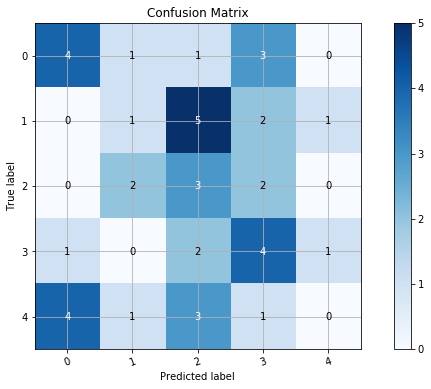

In [0]:
skplt.plot_confusion_matrix(y_test, svm_predictions, figsize = (12,6), x_tick_rotation  = 20)

*Confusin Matrix SVC with tf-idf evaulate features*

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


Log loss: 1.3077525838156732
Accuracy: 0.5323741007194245


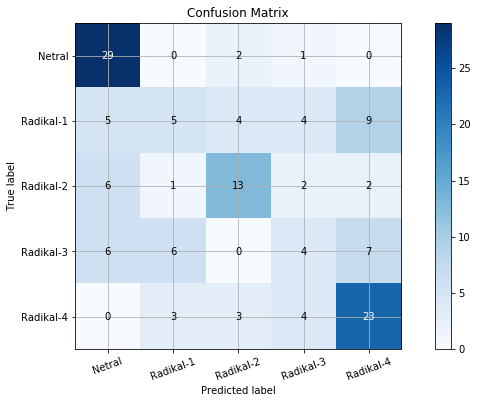

In [0]:
evaluate_features(truncated_tfidf,data['category'].values.ravel(),svm_model_linear)

**KNN**

In [0]:
%%time
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_res, y_train_res) 

CPU times: user 584 µs, sys: 1.91 ms, total: 2.49 ms
Wall time: 2.01 ms


In [0]:
%%time
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 


CPU times: user 5.52 ms, sys: 1.88 ms, total: 7.4 ms
Wall time: 9.41 ms


In [0]:
accuracy 

0.19047619047619047

In [0]:
knn_predictions = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


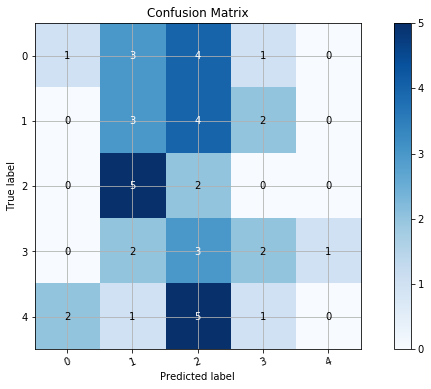

In [0]:
skplt.plot_confusion_matrix(y_test, knn_predictions, figsize = (12,6), x_tick_rotation  = 20)

*Confusion Matrix K-NN with tf-idf evaulate features*

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


Log loss: 7.103337321002984
Accuracy: 0.39568345323741005


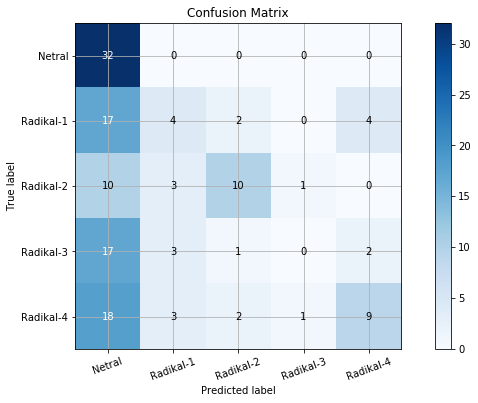

In [0]:
evaluate_features(truncated_tfidf,data['category'].values.ravel(),knn)

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
%%time
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_res,y_train_res)

CPU times: user 155 ms, sys: 1.31 ms, total: 156 ms
Wall time: 160 ms


In [0]:
%%time
# prediction on test set
rf_predictions=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))

Accuracy: 0.42857142857142855
CPU times: user 19.5 ms, sys: 784 µs, total: 20.3 ms
Wall time: 20.1 ms


In [0]:
# creating a confusion matrix   
cm = confusion_matrix(y_test, rf_predictions) 
cm

array([[8, 0, 0, 0, 1],
       [0, 2, 6, 1, 0],
       [0, 0, 3, 2, 2],
       [0, 3, 1, 1, 3],
       [1, 1, 2, 1, 4]])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


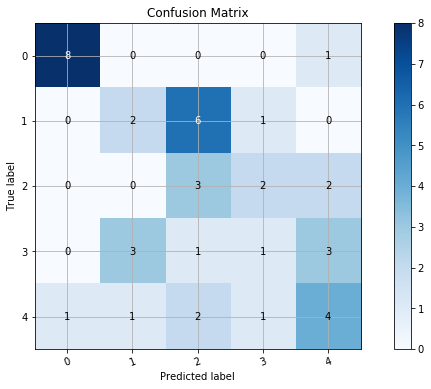

In [0]:
skplt.plot_confusion_matrix(y_test, rf_predictions, figsize = (12,6), x_tick_rotation  = 20)

*Confusion Matrix Random Forest with tf-idf evaulate features*

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


Log loss: 1.2993843385586072
Accuracy: 0.4748201438848921


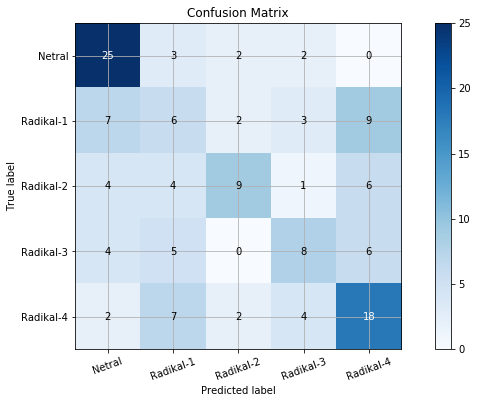

In [0]:
evaluate_features(truncated_tfidf,data['category'].values.ravel(),clf)